### SARIMA model example
* https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
# Read in csv file
portland = pd.read_csv("Resources/PortlandMonthlyAvgRides.csv")

In [3]:
portland.head(10)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [4]:
# Rename column
portland.rename(columns={'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114':'Avg_monthly_rides'}, inplace=True)

In [5]:
# Find and drop na
portland.isna().sum()

Month                1
Avg_monthly_rides    1
dtype: int64

In [6]:
portland.dropna()

,Month,Avg_monthly_rides
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [9]:
# drop last row
portland.drop(portland.index[114], inplace=True)


In [10]:
portland.tail()

,Month,Avg_monthly_rides
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [11]:
# change datatypes
portland['Month'] =  pd.to_datetime(portland['Month'])
portland["Avg_monthly_rides"] = pd.to_numeric(portland["Avg_monthly_rides"])

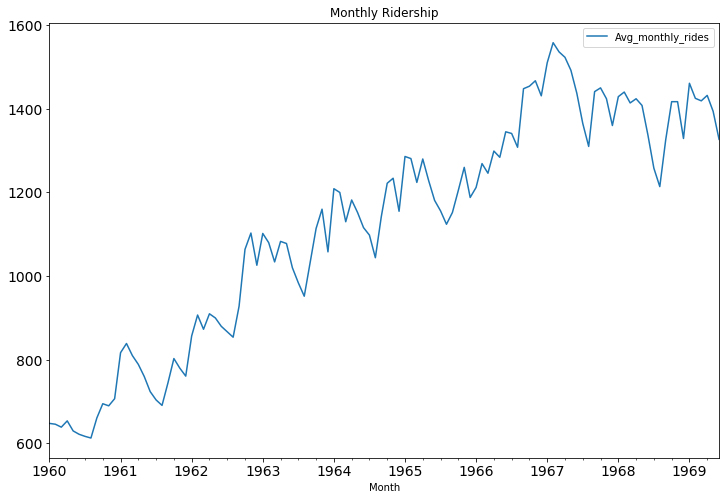

In [12]:
# basic plot
portland.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14, x="Month", y = "Avg_monthly_rides")


In [ ]:
decomposition = seasonal_decompose(portland.Avg_monthly_rides, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

### Taking a look at Autocorrelation



In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(portland['Avg_monthly_rides'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(portland['Avg_monthly_rides'], lags=50, ax=ax2)
plt.show()

In [ ]:
print(sm.tsa.stattools.adfuller(portland['Avg_monthly_rides']))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window=12, cutoff=0.1):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [ ]:
# the smaller p-value, the more likely it's stationary.
test_stationarity(portland['Avg_monthly_rides'])

In [ ]:
# To get a stationary data, there's many techiniques. We can use log, differencing etc

first_diff = portland.Avg_monthly_rides - portland.Avg_monthly_rides.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

In [ ]:
# Test Seasonal difference

seasonal_diff = portland.Avg_monthly_rides - portland.Avg_monthly_rides.shift(12)
seasonal_diff = seasonal_diff.dropna(inplace = False)
test_stationarity(seasonal_diff)

### Sample Code
* https://www.youtube.com/watch?v=z-uSBE8Pxwg

* df["Category"].unique()                     # list unique values
* df.groupby("Category")["Sales"].count()     # groupby category and counting all the sales within that category

* dffurn = df[df.Category=="Furniture"].sort_values("Order_Date")     # Filtering by Furniture cat and sort by Order_Date
* dffurn = dffurn.loc[:, dffurn.columns.isin(["Sales","Order_Date])].reset_index(drop=True)   # drop columns
* dffurn = dffurn.groupby("Order_Date")["Sales"].sum().reset_index()  # This groups by daily sales if you have multiple and sums it. So 
* dffurn = dffurn.set_index("Order_Date)      # Set Order_Date to index

* dffurnmonth = dffurn["Sales"].resample("MS").mean()    # Convert to month and take the mean (finding avg monthly sales)
* dffurnmonth.plot()


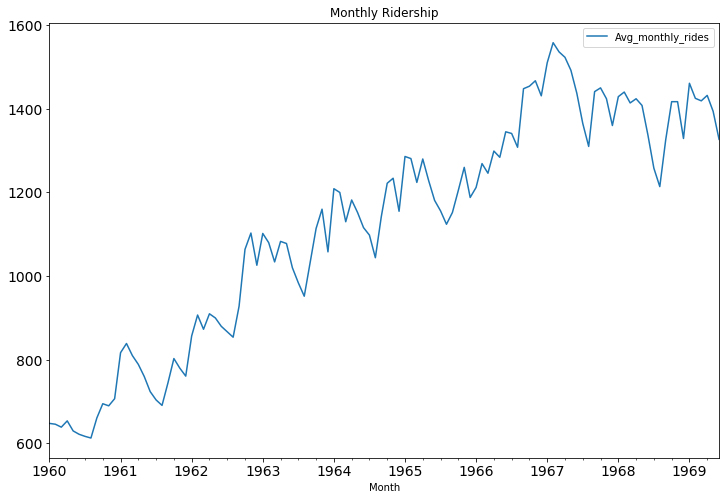

In [13]:
# basic plot (8.30 minute mark)
portland.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14, x="Month", y = "Avg_monthly_rides")

In [49]:
# Train and test split
pdx_train = portland[:len(portland)-42]
pdx_test = portland[len(portland)-42:]
pdx_test

,Month,Avg_monthly_rides
72,1966-01-01,1212
73,1966-02-01,1269
74,1966-03-01,1246
75,1966-04-01,1299
76,1966-05-01,1284
77,1966-06-01,1345
78,1966-07-01,1341
79,1966-08-01,1308
80,1966-09-01,1448
81,1966-10-01,1454


In [15]:
pdx_train[:]
# pdx_test[:]

,Month,Avg_monthly_rides
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
67,1965-08-01,1124
68,1965-09-01,1152
69,1965-10-01,1205
70,1965-11-01,1260


In [99]:
pdx_test

,Month,Avg_monthly_rides
72,1966-01-01,1212
73,1966-02-01,1269
74,1966-03-01,1246
75,1966-04-01,1299
76,1966-05-01,1284
77,1966-06-01,1345
78,1966-07-01,1341
79,1966-08-01,1308
80,1966-09-01,1448
81,1966-10-01,1454


In [16]:
# Reset the index to Month
pdx_train2 = pdx_train.set_index("Month")
pdx_test2 = pdx_test.set_index("Month")

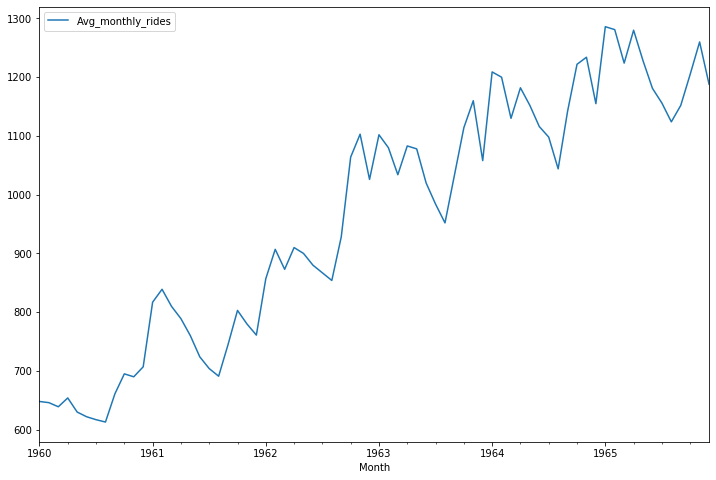

In [34]:
pdx_train2.plot(figsize=(12,8))

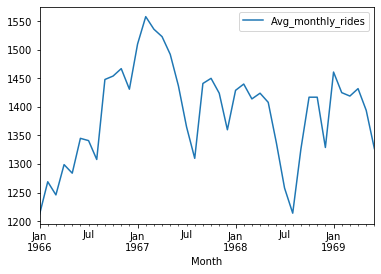

In [20]:
pdx_test2.plot()

In [22]:
# Run Dickey-Fuller test on training data to test STATIONARY

adfullerresult = adfuller(pdx_train2)

print("ADF stats: %f" % adfullerresult[0])
print("p-value: %f" % adfullerresult[1])
print("Critical values:")

for key,value in adfullerresult[4].items():
    print(key, value)

ADF stats: -1.073993
p-value: 0.725331
Critical values:
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


### Note p-value is high.  This data is NOT stationary (p-value should be closer to 0).  We need to do transformation

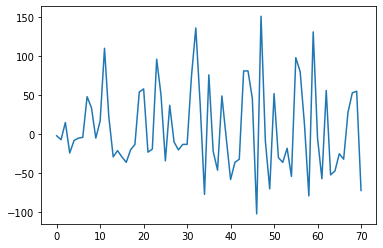

In [24]:
# Let's de-trend by using the differencing technique

X = pdx_train2.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)

plt.plot(diff)
plt.show()

In [25]:
# Run Dickey-Fuller test again on training data to test STATIONARY

adfullerresult = adfuller(diff)

print("ADF stats: %f" % adfullerresult[0])
print("p-value: %f" % adfullerresult[1])
print("Critical values:")

for key,value in adfullerresult[4].items():
    print(key, value)

ADF stats: -1.792655
p-value: 0.384114
Critical values:
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


### Note the p-value has decreased from 0.725 to 0.384

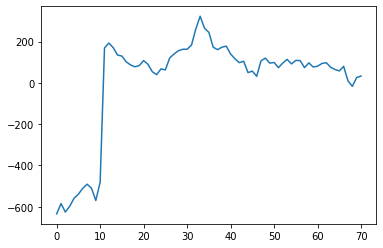

In [35]:
X12 = pdx_train2.values
diff12 = list()
for i in range(1, len(X)):
    value = X[i] - X[i-12]
    diff12.append(value)

plt.plot(diff12)
plt.show()

In [36]:
adfullerresult = adfuller(diff12)

print("ADF stats: %f" % adfullerresult[0])
print("p-value: %f" % adfullerresult[1])
print("Critical values:")

for key,value in adfullerresult[4].items():
    print(key, value)

ADF stats: -2.687343
p-value: 0.076254
Critical values:
1% -3.5274258688046647
5% -2.903810816326531
10% -2.5893204081632653


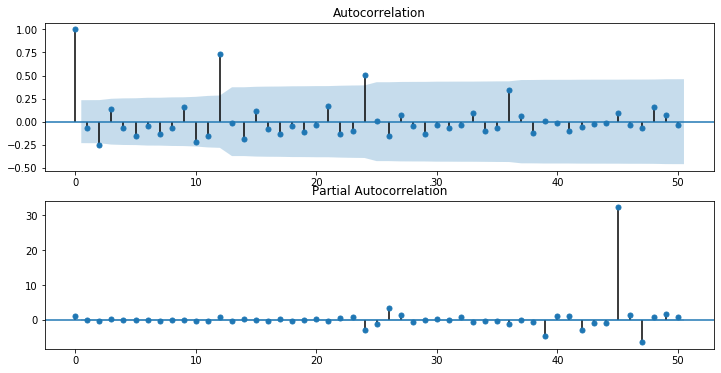

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(diff, ax=ax[0], lags=50)
ax[1] = plot_pacf(diff, ax=ax[1], lags=50)

### Finding the best seasonal model

In [122]:
# Let's find the best model

p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seas_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [125]:
metric_aic_dict = dict()

for pm in pdq:
    for pm_seas in seas_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(pdx_train2,
                                            order=pm,
                                            seasonal_order = pm_seas)
#                                             enforce_stationarity = False,
#                                             enfore_invertibility = False)
            model_aic = model.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(pm, pm_seas, model_aic.aic))
            metric_aic_dict.update({(pm, pm_seas):model_aic.aic})
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1198.994814354467
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1134.7675888549231
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:755.0919168895479
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:740.2698900406333
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:956.073671770217
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:952.7690823194173
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:723.893161981083
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:713.7781698570992
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1108.9895491839006
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1044.347324829294
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:693.2757681048712
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:682.810042786655
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:903.3059995904414
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:884.7576558989399
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:672.8156373773392
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:663.970456873172
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:773.3767612308106
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:731.4202707814009
ARIMA(0, 1, 

In [126]:
# Sort by lowest AIC first and print top 5

best = {k: v for k, v in sorted(metric_aic_dict.items(), key=lambda x:x[1])}
best
list(best.items())[0:5]


[(((0, 1, 0), (0, 1, 1, 12)), 572.5362312789074),
 (((0, 1, 0), (1, 1, 1, 12)), 573.0312044448349),
 (((0, 1, 0), (1, 1, 0, 12)), 573.2846925424101),
 (((0, 1, 0), (0, 1, 0, 12)), 573.8564291296227),
 (((0, 1, 1), (0, 1, 1, 12)), 574.4342868718177)]

### We have determined SARIMA model with lowest AIC

### Let's forecast


#### Step 1: Create the model and fit it

In [127]:
final_model = sm.tsa.statespace.SARIMAX(pdx_train2,
                                            order=(0,1,0),
                                            seasonal_order = (0,1,1,12))
#                                             enforce_stationarity = False,
#                                             enfore_invertibility = False)
final_model_aic = final_model.fit()
print(final_model_aic.summary().tables[0])

                                      SARIMAX Results                                       
Dep. Variable:                    Avg_monthly_rides   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -284.268
Date:                              Tue, 28 Jul 2020   AIC                            572.536
Time:                                      17:29:39   BIC                            576.691
Sample:                                  01-01-1960   HQIC                           574.158
                                       - 12-01-1965                                         
Covariance Type:                                opg                                         


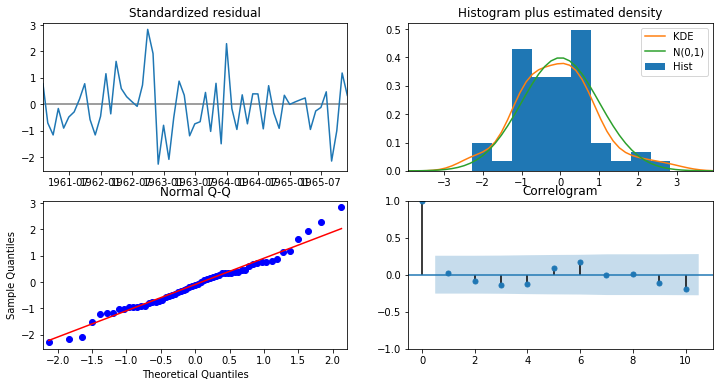

In [128]:
# Plot diagnostics for residuals

final_model_aic.plot_diagnostics(figsize=(12, 6))
plt.show()

# NOTES:
# Histogram: Residuals are almost normally distributed
# ACF plot: There are no significant lags
# QQ plot: Dots are almost on the line with some trailing off
# Standardized residual plot: Its almost constant, not varying a lot. There is not pattern either.

#### Step 2: Use predict() method. Note that you have to give start and end parameter

In [129]:

# final_predictions = final_forecast.predicted_mean()
# predicted_ci = final_forecast.conf_int()


In [154]:
forecast = final_model_aic.get_prediction(start=pd.to_datetime('1966-01-01'), end=pd.to_datetime('1969-06-01'))
predictions = forecast.predicted_mean.values

actual = pdx_test2.Avg_monthly_rides['1966-01-01':].values

rmse = np.sqrt((predictions - actual) ** 2).mean()
print("RMSE for forecast is {}".format(round(rmse,2)))


RMSE for forecast is 85.69


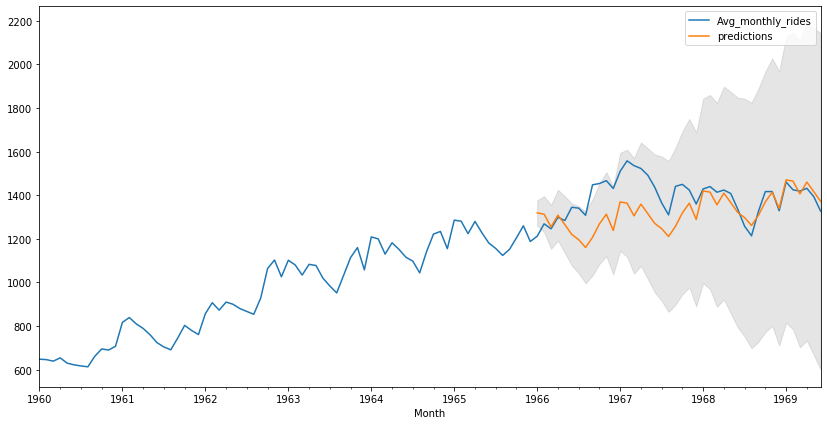

In [164]:
forecast2 = final_model_aic.get_forecast(steps=42)
predictions2 = forecast2.predicted_mean
ci_predictions2 = forecast2.conf_int()

# Observed plot
portland2 = portland.set_index("Month")
fig = portland2.plot(label="observed", figsize=(14,7))
fig.fill_between(ci_predictions2.index, 
                 ci_predictions2.iloc[:, 0], 
                 ci_predictions2.iloc[:, 1], 
                 color="gray", alpha=0.2)

# Prediction plot
predictions2.plot(ax=fig, label="predictions", figsize=(14,7))

plt.legend()
plt.show()